<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/NLP_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Topic Modeling

---

Find subject

Two methods:
- LSA (Latent Semantic Analysis) or LSI (Latent Semantic Indexing): 
- LDA (Latent Dirichlet Allocation):


## Data

---
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html


In [ ]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True,
                            random_state=1,
                            remove=('headers','footers','quotes'))
documents = dataset.data
print(len(documents))
documents[0]

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
import pandas as pd

news_df = pd.DataFrame({'article':documents})
len(news_df)

11314

In [ ]:
news_df.head()

,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


## Language pre-processing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  text = re.sub(pattern, '', d)
  return d

def clean_stopword(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w)>3])

def preprocessing(d):
  return preprocess_string(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**delete empty line**

In [ ]:
news_df.replace("", float("NaN"), inplace=True)
#news_df.isnull().values.any()
news_df.dropna(inplace=True)
print(len(news_df))

11096


***text cleaning*** (only english word)

In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df

,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


**stopwords, lower case, rare words**

In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df

,article
0,well sure story seem biased. what disagree sta...
1,"yeah, expect people read faq, etc. actually ac..."
2,"although realize principle strongest points, w..."
3,"notwithstanding legitimate fuss proposal, much..."
4,"well, change scoring playoff pool. unfortunate..."
...,...
11309,"danny rubenstein, israeli journalist, speaking..."
11310,
11311,agree. home runs clemens always memorable. kin...
11312,used deskjet orange micros grappler system6.0....


In [ ]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
print(tokenized_news[0:2])

[['sure', 'stori', 'bias', 'disagre', 'statement', 'media', 'ruin', 'israel', 'reput', 'redicul', 'media', 'pro', 'isra', 'media', 'world', 'have', 'live', 'europ', 'realiz', 'incid', 'describ', 'letter', 'occur', 'media', 'ignor', 'subsid', 'israel', 'exist', 'european', 'degre', 'think', 'reason', 'report', 'clearli', 'atroc', 'shame', 'austria', 'daili', 'report', 'inhuman', 'act', 'commit', 'isra', 'soldier', 'bless', 'receiv', 'govern', 'make', 'holocaust', 'guilt', 'awai', 'look', 'jew', 'treat', 'race', 'power', 'unfortun'], ['yeah', 'expect', 'peopl', 'read', 'faq', 'actual', 'accept', 'hard', 'atheism', 'need', 'littl', 'leap', 'faith', 'jimmi', 'logic', 'run', 'steam', 'jim', 'sorri', 'piti', 'jim', 'sorri', 'feel', 'denial', 'faith', 'need', 'pretend', 'happili', 'mayb', 'start', 'newsgroup', 'alt', 'atheist', 'hard', 'bummin', 'bye', 'bye', 'jim', 'forget', 'flintston', 'chewabl', 'bake', 'timmon']]


In [ ]:
import numpy as np
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence)<=1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))

10936


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## Topic modeling with Gensim

---

https://radimrehurek.com/gensim/

https://pypi.org/project/gensim/

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]


## LSA (LSI)

In [ ]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '-0.249*"imag" + -0.226*"edu" + 0.214*"output" + 0.165*"peopl" + 0.157*"know" + 0.155*"entri" + 0.153*"said" + -0.153*"avail" + -0.142*"jpeg" + -0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.125*

**coherence**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
min_topics, max_topics = 20, 25
coherence_scores = []
for num_topics in range(min_topics, max_topics):
  model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())

In [ ]:
print(coherence_scores)

[0.4511204172939589, 0.5033489151411342, 0.4355222765171405, 0.48794935565574366, 0.4861661025069997]


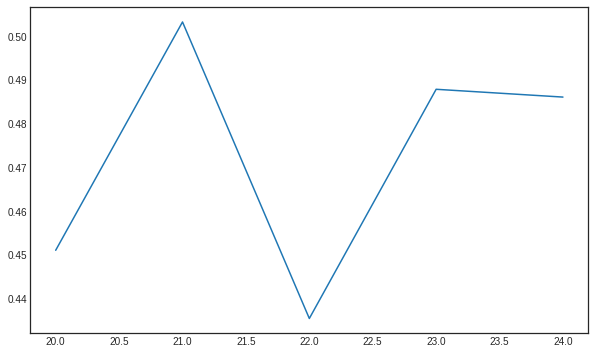

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = [int(i) for i in range(min_topics, max_topics)]
plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.show()

In [ ]:
lsi_model = LsiModel(corpus, num_topics=22, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '-0.249*"imag" + -0.226*"edu" + 0.214*"output" + 0.165*"peopl" + 0.157*"know" + 0.155*"entri" + 0.153*"said" + -0.153*"avail" + -0.142*"jpeg" + -0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"inform" + 0.123*"m

## LDA

In [ ]:
from gensim.models import LdaModel
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.011*"jesu" + 0.009*"israel" + 0.007*"time" + 0.006*"peopl" + 0.006*"isra" + 0.006*"know" + 0.005*"work" + 0.005*"come" + 0.004*"god" + 0.004*"lock"'),
 (1,
  '0.010*"year" + 0.010*"health" + 0.007*"like" + 0.006*"time" + 0.005*"medic" + 0.005*"diseas" + 0.005*"good" + 0.003*"patient" + 0.003*"thing" + 0.003*"think"'),
 (2,
  '0.011*"peopl" + 0.008*"right" + 0.007*"think" + 0.007*"govern" + 0.006*"state" + 0.005*"know" + 0.005*"work" + 0.005*"like" + 0.005*"year" + 0.004*"time"'),
 (3,
  '0.022*"game" + 0.015*"team" + 0.014*"armenian" + 0.012*"year" + 0.009*"player" + 0.008*"plai" + 0.008*"season" + 0.005*"score" + 0.005*"leagu" + 0.005*"good"'),
 (4,
  '0.020*"file" + 0.015*"entri" + 0.014*"edu" + 0.009*"com" + 0.007*"post" + 0.006*"mail" + 0.005*"send" + 0.005*"inform" + 0.005*"messag" + 0.005*"like"'),
 (5,
  '0.008*"color" + 0.006*"hockei" + 0.006*"coli" + 0.005*"candida" + 0.004*"argv" + 0.004*"alloc" + 0.004*"edu" + 0.003*"list" + 0.003*"space" + 0.003*"auth"'),
 (6,
  '

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
min_topics, max_topics = 20, 25
coherence_scores = []
for num_topics in range(min_topics, max_topics):
  model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())

In [ ]:
print(coherence_scores)

[0.5150862846431203, 0.4966568502189161, 0.48192936283875537, 0.5259753000872773, 0.4939153326733781]


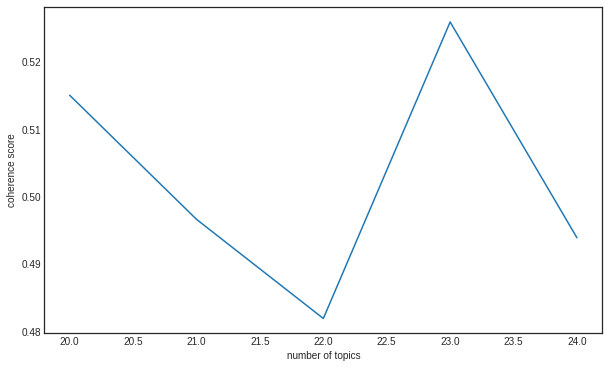

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = [int(i) for i in range(min_topics, max_topics)]
plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [ ]:
lda_model = LdaModel(corpus, num_topics=24, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(4,
  '0.010*"entri" + 0.008*"contest" + 0.007*"health" + 0.006*"widget" + 0.005*"section" + 0.005*"nist" + 0.005*"includ" + 0.005*"code" + 0.005*"applic" + 0.005*"program"'),
 (12,
  '0.010*"peopl" + 0.007*"said" + 0.006*"time" + 0.006*"state" + 0.005*"moral" + 0.005*"like" + 0.005*"believ" + 0.005*"mean" + 0.005*"present" + 0.004*"know"'),
 (22,
  '0.008*"like" + 0.007*"know" + 0.007*"time" + 0.007*"think" + 0.006*"peopl" + 0.005*"ground" + 0.005*"thing" + 0.004*"wire" + 0.004*"post" + 0.004*"work"'),
 (8,
  '0.037*"armenian" + 0.007*"russian" + 0.007*"peopl" + 0.007*"armenia" + 0.007*"azerbaijan" + 0.006*"muslim" + 0.006*"azeri" + 0.006*"henrik" + 0.005*"kill" + 0.005*"said"'),
 (16,
  '0.016*"bike" + 0.009*"ride" + 0.008*"car" + 0.008*"good" + 0.007*"like" + 0.007*"mile" + 0.006*"road" + 0.005*"power" + 0.005*"motorcycl" + 0.005*"look"'),
 (11,
  '0.024*"game" + 0.017*"year" + 0.017*"team" + 0.013*"plai" + 0.011*"player" + 0.008*"season" + 0.007*"good" + 0.007*"score" + 0.006*"lik

## Interactive visualization using pyLDAvis

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 26.7MB/s 
     |████████████████████████████████| 15.3MB 302kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=e3863966141fcd2deffb73d815a0b862436f660ee52f4cc03aed3ce0f3779257
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

pyLDAvis.display is not shown in GitHub, so please see captured picture below or visit Google colab

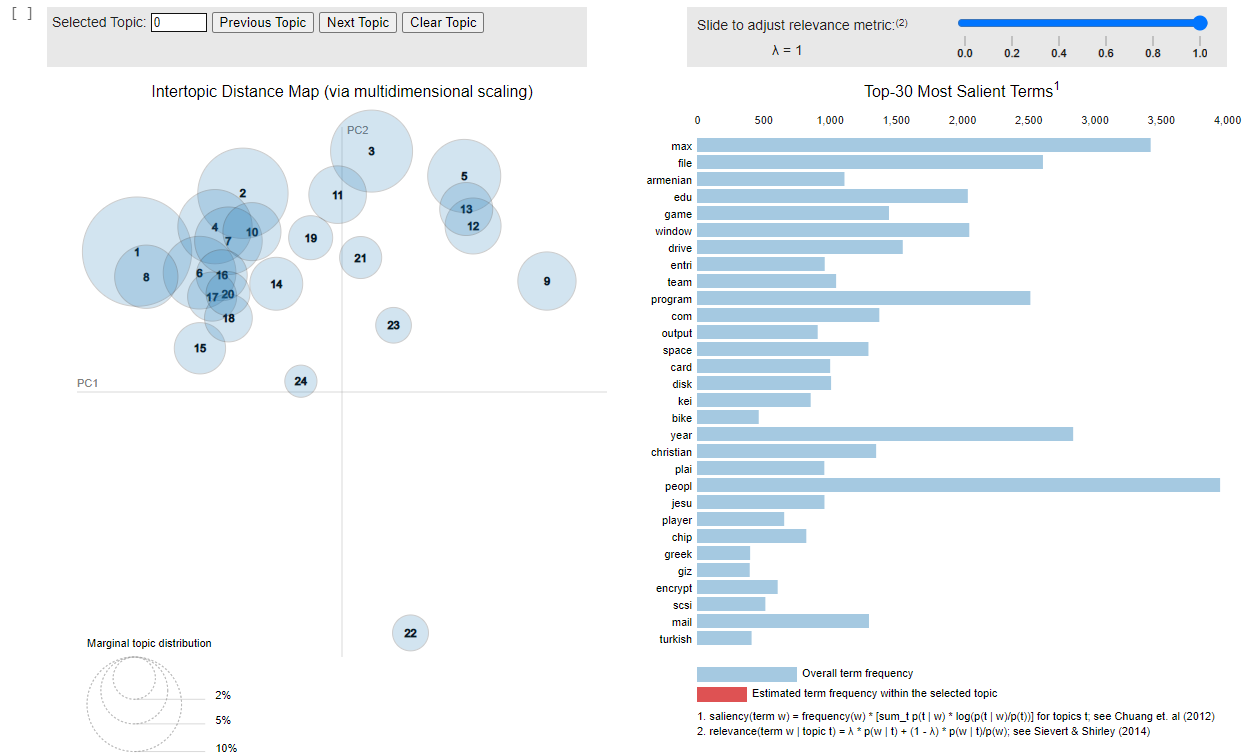